In [1]:
import os
import json
import random
from pathlib import Path
from zipfile import ZipFile

In [37]:
import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [3]:
kaggle_data = json.load(open(str(Path.home()) + '/kaggle.json', 'r'))
KAGGLE_USERNAME = kaggle_data['username']
KAGGLE_KEY = kaggle_data['key']

In [4]:
if KAGGLE_KEY and KAGGLE_USERNAME: print('Successfully imported access to kaggle')

Successfully imported access to kaggle


In [5]:
os.environ['KAGGLE_USERNAME'] = KAGGLE_USERNAME
os.environ['KAGGLE_KEY'] = KAGGLE_KEY

In [6]:
print('Dataset will be downloaded as zip under the current directory')
!kaggle datasets download -d sveneschlbeck/beginners-regression-dataset

Dataset will be downloaded as zip under the current directory
  0%|                                                 | 0.00/401 [00:00<?, ?B/s]
100%|███████████████████████████████████████████| 401/401 [00:00<00:00, 161kB/s]


In [33]:
!rm -rf data/ && unzip *.zip -d ./data

Archive:  beginners-regression-dataset.zip
  inflating: ./data/apartment_prices.csv  


In [13]:
!ls data/

apartment_prices.csv


In [32]:
df = pd.read_csv('./data/apartment_prices.csv'); df.head()

,Squaremeter,Price
0,70,351
1,72,39
2,91,473
3,58,282
4,49,3


## EDA / dataviz

### First feature -> Squaremeter

In [30]:
current = df['Squaremeter']
current.min(), current.max(), current.mean(), current.median()

(11, 109, 61.9, 60.5)

array([[<AxesSubplot:title={'center':'Squaremeter'}>]], dtype=object)

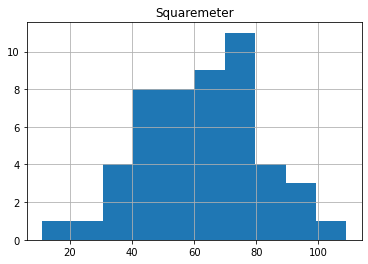

In [20]:
%matplotlib inline
df.hist(column='Squaremeter', bins=10)

In [31]:
current = df['Price']
current.min(), current.max(), current.mean(), current.median()

(3, 576, 304.1, 306.5)

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

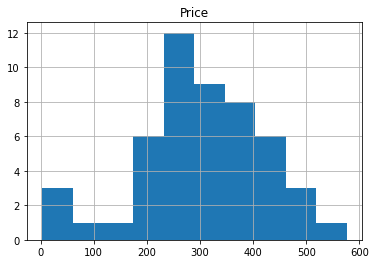

In [29]:
%matplotlib inline
df.hist(column='Price', bins=10)

## Prediction and model training evolution

In [36]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

First let's define our X and y, then separate on two set to be able to compute training metrics
- Independant variable (X) -> Squaremeter
- dependant variable (y) -> Price

In [38]:
X, y = df['Squaremeter'], df['Price']

In [ ]:
X_train = ...
y_train = ...

In [ ]:
X_valid = ...
y_valid = ...

In [ ]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)